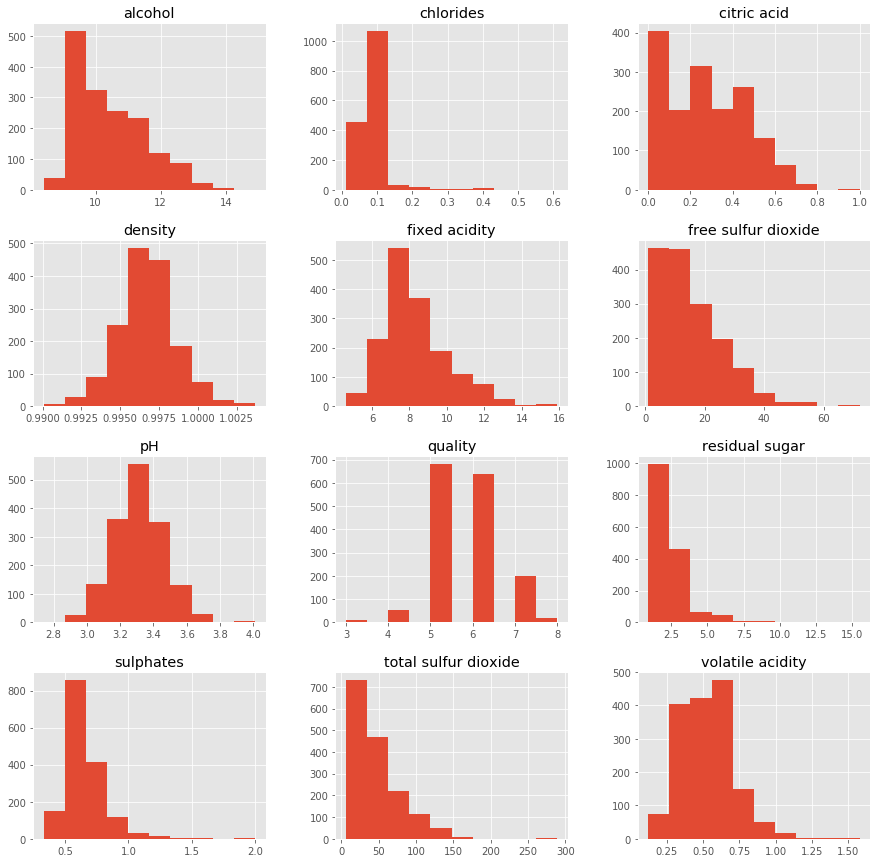

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';')
pd.DataFrame.hist(df, figsize = [15,15]);

In [2]:
features = df.drop('quality', 1).values
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
def isGood(quality):
    if quality >= 6:
        return 1
    else:
        return 0
df['binary_quality'] = df['quality'].apply(isGood)
label = df['binary_quality'].values
df['binary_quality'].value_counts()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42, stratify=label)

In [8]:
%%time
from sklearn import neighbors, linear_model
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn_model = knn.fit(X_train, y_train)
print('k-NN accuracy for test set: %f' % knn_model.score(X_test, y_test))

k-NN accuracy for test set: 0.634375
CPU times: user 43.8 ms, sys: 17.4 ms, total: 61.2 ms
Wall time: 77.8 ms


In [9]:
%%time
# SVM
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
print('SVM accuracy for test set: %f' % svm_model.score(X_test, y_test))

SVM accuracy for test set: 0.718750
CPU times: user 93.4 ms, sys: 5.24 ms, total: 98.6 ms
Wall time: 99.5 ms


In [10]:
# Now we rescale the feature values
df_rescaled = df
df_rescaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binary_quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [11]:
features = df_rescaled.drop(['quality', 'binary_quality'], 1)

In [12]:
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [13]:
normalized_features=(features-features.min())/(features.max()-features.min())

In [15]:
%%time
from sklearn.model_selection import train_test_split
from sklearn import neighbors, linear_model

X_train, X_test, y_train, y_test = train_test_split(normalized_features, label, test_size=0.2, random_state=42)
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn_model = knn.fit(X_train, y_train)
print('k-NN accuracy for test set after rescaling: %f' % knn_model.score(X_test, y_test))

k-NN accuracy for test set after rescaling: 0.718750
CPU times: user 17.4 ms, sys: 1.42 ms, total: 18.8 ms
Wall time: 17.7 ms


In [16]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.69      0.67      0.68       141
          1       0.74      0.76      0.75       179

avg / total       0.72      0.72      0.72       320



In [32]:
from sklearn.model_selection import cross_val_score
knn_scores = cross_val_score(knn_model, normalized_features, label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))

Accuracy: 0.65 (+/- 0.05)


In [17]:
%%time
# SVM
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

CPU times: user 63.9 ms, sys: 2.85 ms, total: 66.7 ms
Wall time: 72.2 ms


In [18]:
print('Linear SVM accuracy for test set after rescaling: %f' % svm_model.score(X_test, y_test))

Linear SVM accuracy for test set after rescaling: 0.725000


In [19]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, svm_model.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.66      0.78      0.71       141
          1       0.80      0.68      0.73       179

avg / total       0.74      0.72      0.73       320



In [33]:
from sklearn.model_selection import cross_val_score
svm_scores = cross_val_score(svm_model, normalized_features, label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (svm_scores.mean(), svm_scores.std() * 2))

Accuracy: 0.72 (+/- 0.10)


In [30]:
%%time
# Nonlinear SVM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_model = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf",LinearSVC(C=10, loss="hinge"))))
polynomial_svm_model.fit(X_train, y_train)

CPU times: user 1.32 s, sys: 20.6 ms, total: 1.34 s
Wall time: 1.36 s


In [31]:
print('Nonlinear SVM accuracy for test set: %f' % polynomial_svm_model.score(X_test, y_test))

Nonlinear SVM accuracy for test set: 0.728125


In [22]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, polynomial_svm_model.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.69      0.64      0.66       141
          1       0.73      0.77      0.75       179

avg / total       0.71      0.71      0.71       320



In [60]:
%%time
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train, y_train)
print('Decision Tree accuracy for test set: %f' % tree_model.score(X_test, y_test))

Decision Tree accuracy for test set: 0.681250
CPU times: user 4.27 ms, sys: 1.39 ms, total: 5.66 ms
Wall time: 4.6 ms


In [24]:
from sklearn.tree import export_graphviz

export_graphviz(tree_model,
                out_file=None,
                class_names=['0','1'])

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[10] <= 0.327\\ngini = 0.498\\nsamples = 1279\\nvalue = [603, 676]\\nclass = 1"] ;\n1 [label="X[9] <= 0.147\\ngini = 0.464\\nsamples = 786\\nvalue = [498, 288]\\nclass = 0"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.328\\nsamples = 314\\nvalue = [249, 65]\\nclass = 0"] ;\n1 -> 2 ;\n3 [label="gini = 0.498\\nsamples = 472\\nvalue = [249, 223]\\nclass = 0"] ;\n1 -> 3 ;\n4 [label="X[9] <= 0.153\\ngini = 0.335\\nsamples = 493\\nvalue = [105, 388]\\nclass = 1"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="gini = 0.495\\nsamples = 127\\nvalue = [57, 70]\\nclass = 1"] ;\n4 -> 5 ;\n6 [label="gini = 0.228\\nsamples = 366\\nvalue = [48, 318]\\nclass = 1"] ;\n4 -> 6 ;\n}'

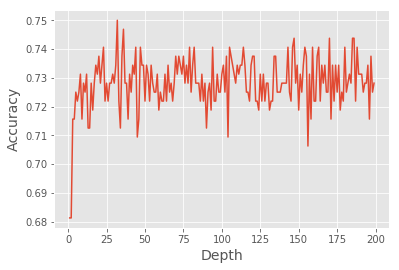

In [54]:
# Plot the relationship between tree depths and prediction power
depth = []
accuracy = []
for x in range(1, 200):
    depth.append(x)
    tree_model = DecisionTreeClassifier(max_depth=x)
    tree_model.fit(X_train, y_train)
    accu = tree_model.score(X_test, y_test)
    accuracy.append(accu)
    plt.xlabel("Depth", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
plt.plot(depth, accuracy)
plt.show()

In [56]:
%%time
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
print('Naive Bayes accuracy for test set: %f' % nb_model.score(X_test, y_test))

Naive Bayes accuracy for test set: 0.734375
CPU times: user 3.76 ms, sys: 2.11 ms, total: 5.87 ms
Wall time: 4.12 ms


In [57]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
print('Naive Bayes accuracy for test set: %f' % nb_model.score(X_test, y_test))

Naive Bayes accuracy for test set: 0.659375


In [58]:
from sklearn.naive_bayes import BernoulliNB
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)
print('Naive Bayes accuracy for test set: %f' % nb_model.score(X_test, y_test))

Naive Bayes accuracy for test set: 0.565625


In [59]:
%%time
# Neural Network
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp_model.fit(X_train, y_train)
print('Neural Network accuracy for test set: %f' % mlp_model.score(X_test, y_test))

Neural Network accuracy for test set: 0.728125
CPU times: user 975 ms, sys: 19.3 ms, total: 995 ms
Wall time: 538 ms
